In [1]:
#!/usr/bin/env python
# -*-coding:utf-8 -*-
'''
@File    :   assignment_6_Weather.ipynb
@Time    :   2024/11/12 18:22:05
@Author  :   Guillermo Martin
@Version :   1.0
@Personal email : gfmg1992@hotmail.com
@Student email: G00438885@atu.ie
@License :   (C)Copyright 2023, Guillermo Martin
@Desc    :   Assignment 6 - Weather Analysis
'''


'\n@File    :   assignment_6_Weather.ipynb\n@Time    :   2024/11/12 18:22:05\n@Author  :   Guillermo Martin\n@Version :   1.0\n@Personal email : gfmg1992@hotmail.com\n@Student email: G00438885@atu.ie\n@License :   (C)Copyright 2023, Guillermo Martin\n@Desc    :   Assignment 6 - Weather Analysis\n'

In [2]:
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt 

In [3]:
url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'
df = pd.read_csv(url, skiprows=23) 

C:\Users\Owner\AppData\Local\Temp\ipykernel_1844\3910371570.py:2: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=23)


In [4]:
# Changing date format but keeping original column
df['timestamp'] = pd.to_datetime(df['date'])
df['date2']=df['timestamp'].dt.normalize() #Only Date, no time

#df.head()

C:\Users\Owner\AppData\Local\Temp\ipykernel_1844\145654554.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp'] = pd.to_datetime(df['date'])


In [5]:
# Setting the TimeStamp as the index for calculations: 
df.set_index('timestamp', inplace=True)

In [6]:
#df['Day']=df['timestamp'].dt.strftime("%d")
#df['Month']=df['timestamp'].dt.strftime("%m")
#df['Year']=df['timestamp'].dt.strftime("%Y")

# Temperature Data Plot

In [7]:
# Average temperature each day:
#df['Temp_Day_mean'] = df.groupby(['date2'])['temp'].transform('mean')
Temp_Day_mean = df['temp'].resample('D').mean() #Using resample based on the index (timestamp)

# Average temperature per month
#df['Temp_Month_mean'] = df.groupby(['Year', 'Month'])['temp'].transform('mean')
Temp_Month_mean = df['temp'].resample('m').mean() #Using resample based on the index (timestamp)

C:\Users\Owner\AppData\Local\Temp\ipykernel_1844\1344340718.py:7: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  Temp_Month_mean = df['temp'].resample('m').mean() #Using resample based on the index (timestamp)


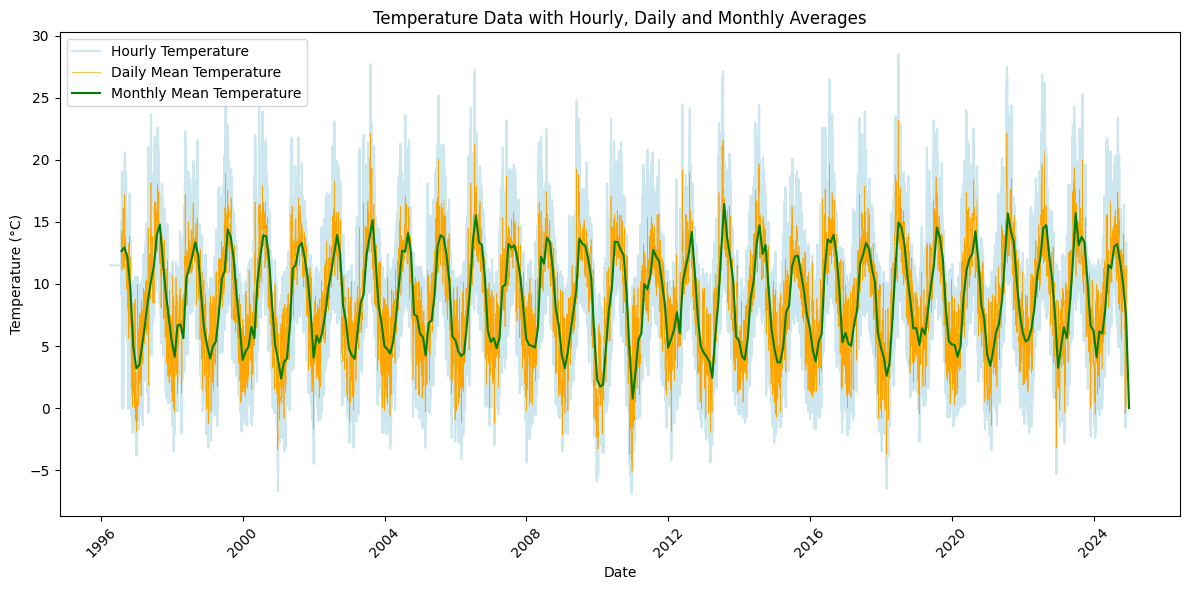

In [8]:
#To check in a given year
#df_1996 = df[df['Year'] == '1996']
#dfsub = df.iloc[100:200,:]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Daily temperature data
ax.plot(df.index, df['temp'], label='Hourly Temperature', color='lightblue', alpha=0.6)

# Daily mean temperature
ax.plot(Temp_Day_mean.index, Temp_Day_mean, label='Daily Mean Temperature', color='orange',linewidth=.5)

# Monthly mean temperature
ax.plot(Temp_Month_mean.index, Temp_Month_mean, label='Monthly Mean Temperature', color='green')

# Formatting the plot
ax.set_xlabel("Date")
ax.set_ylabel("Temperature (°C)")
ax.set_title("Temperature Data with Hourly, Daily and Monthly Averages")
ax.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Wind plot

In [9]:
#wdsp is an object. Transform to numeric
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

In [10]:
# Several NaN (a total of 50)
df['wdsp'].isnull().sum()

np.int64(50)

In [11]:
# Max Wind Speed
#df['Day_max_wdsp'] = df.groupby(['Day', 'Month','Year'])['wdsp'].transform('max')
wdsp_daily_max = df['wdsp'].resample('D').max() #Using resample based on the index (timestamp)

#The monthly mean of the daily max windspeeds
#df['Mean_Month_max_wdsp'] = df.groupby(['Year', 'Month'])['Day_max_wdsp'].transform('mean')
wdsp_monthly_mean = wdsp_daily_max.resample('m').mean() #Using resample based on the index (timestamp)

#Rolling average every 24 hours
df['windspeed_rolling_24h'] = df['wdsp'].rolling(24).mean()

C:\Users\Owner\AppData\Local\Temp\ipykernel_1844\2734856400.py:7: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  wdsp_monthly_mean = wdsp_daily_max.resample('m').mean() #Using resample based on the index (timestamp)


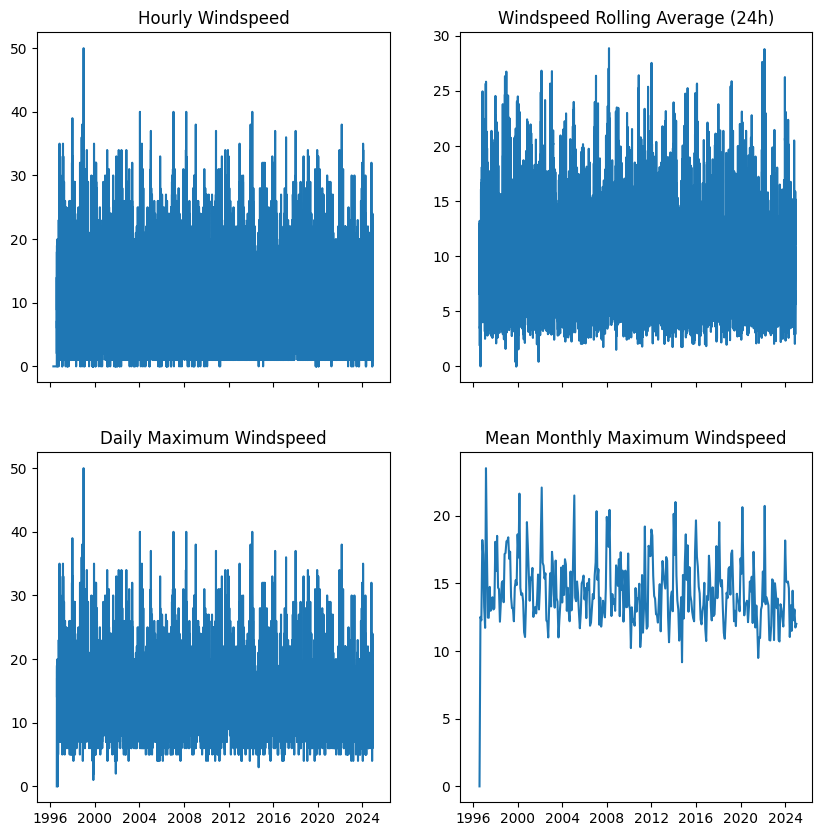

In [12]:
# Plotting
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(10, 10), sharex=True)

# Daily windpseed data
ax1.plot(df.index, df['wdsp'])
ax1.set_title("Hourly Windspeed")

# Rolling average of windspeed every 24 hours
ax2.plot(df.index, df['windspeed_rolling_24h'])
ax2.set_title("Windspeed Rolling Average (24h)")

# Daily maximum windspeed
ax3.plot(wdsp_daily_max.index, wdsp_daily_max)
ax3.set_title("Daily Maximum Windspeed")

# Monthly mean of the daily max windspeeds
ax4.plot(wdsp_monthly_mean.index, wdsp_monthly_mean)
ax4.set_title("Mean Monthly Maximum Windspeed")

plt.show()